<a href="https://colab.research.google.com/github/Tanushree-233/Machine_Learning/blob/main/ML_Exp_13_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving alzheimers_disease_data.csv to alzheimers_disease_data.csv


✅ LDA Model Accuracy: 82.79 %

Confusion Matrix:
 [[248  29]
 [ 45 108]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.79      0.71      0.74       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430



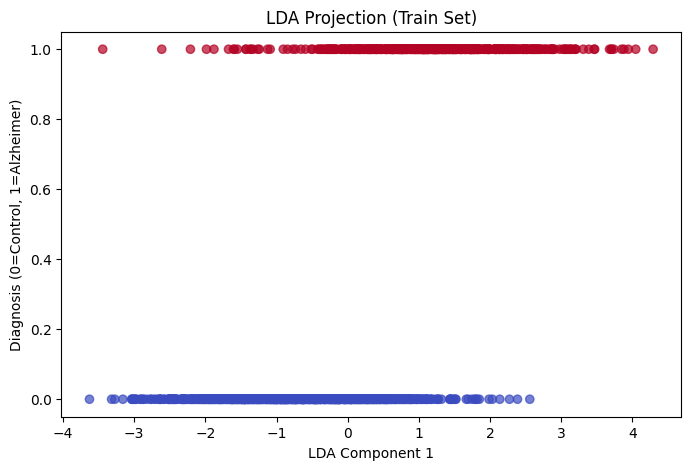

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import io

# -----------------------------
# 1. Load and clean dataset
# -----------------------------
# Use the DataFrame created from the uploaded file
uploaded_filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[uploaded_filename]))

# Drop non-numeric or irrelevant columns
df = df.drop(columns=["PatientID", "DoctorInCharge"], errors='ignore')

# Separate features and target
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

# -----------------------------
# 2. Split data
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 3. Standardize features
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 4. Apply LDA
# -----------------------------
lda = LinearDiscriminantAnalysis(n_components=1)  # 1D projection since binary
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# -----------------------------
# 5. Evaluate model
# -----------------------------
y_pred = lda.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print("✅ LDA Model Accuracy:", round(acc * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# 6. Plot LDA projection
# -----------------------------
plt.figure(figsize=(8, 5))
plt.scatter(X_train_lda, y_train, c=y_train, cmap='coolwarm', alpha=0.7)
plt.title("LDA Projection (Train Set)")
plt.xlabel("LDA Component 1")
plt.ylabel("Diagnosis (0=Control, 1=Alzheimer)")
plt.show()